# **RNN for System Identification**

y[n]=-0.5y[n-1]-y[n-2]+0.5u[n]

The coefficients will be determined from the RNN.

1. Back Propagation Through Time (BPTT) 





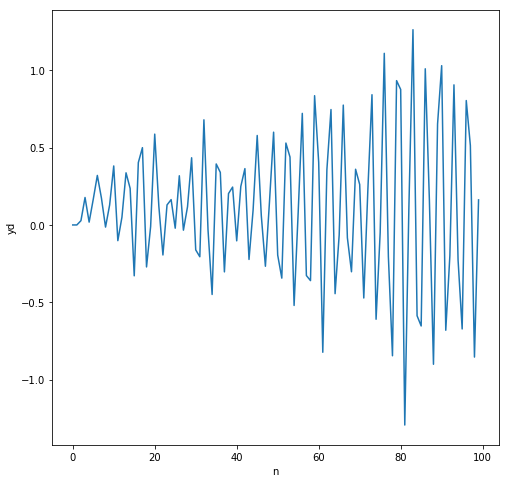

In [0]:
#data generation
import numpy as np
u=np.random.rand(100,1)
yd=np.zeros((len(u),1))
for i in range(2,len(u)):
  yd[i]=-0.5*yd[i-1]-yd[i-2]+0.5*u[i]
  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(yd)
plt.xlabel('n');
plt.ylabel('yd');

In [0]:
#training
#activation is ReLU
iterations=1000
eta=0.01
w1=np.random.rand(1,1)[0,0]
w2=np.random.rand(1,1)[0,0]
w3=np.random.rand(1,1)[0,0]
block=4
y=np.zeros((len(u),1))

for m in range(iterations):
  for i in range(2,len(u)-block,block):#unroll for 1 block
    for j in range(0,block):
      y[i+j]=(w1*y[i+j-1]+w2*y[i+j-2]+w3*u[i+j])

    delw=np.zeros((block+1,1))
    for k in range(block-1,-1,-1):
      delw[k]=(delw[k+1]*w1+(yd[i+k]-y[i+k]))#ReLU
# *y[i+k]*(1-y[i+k])
      w1+=eta*delw[k]*y[i+k-1]
      w2+=eta*delw[k]*y[i+k-2]
      w3+=eta*delw[k]*u[i+k]

print('The coeff. from RNN are : ',w1,w2,w3)

The coeff. from RNN are :  [-0.5] [-1.] [0.5]


2. Real Time Recurrent Learning (RTRL)

The coeff. from RNN are :  [-0.48887219] [-0.92834507] [0.56360286]


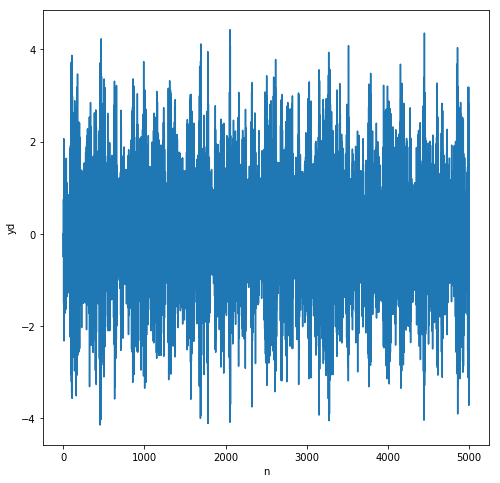

In [0]:
#training
#sigmoidal activation
import numpy as np
iterations=5000
eta=0.0005
w=np.random.rand(3,1)*0.01
yd=np.zeros((iterations,1))
u=np.zeros((iterations,1))
y=np.zeros((iterations,1))
pw=np.zeros((iterations,3))

for j in range(2,iterations):
  x=np.random.rand(1,1)[0,0]
  if x>0.5:
    u[j-1]=-1
  else:
    u[j-1]=1
  yd[j]=-0.5*yd[j-1]-0.94*yd[j-2]+0.5*u[j-1]
  y[j]=w[0]*yd[j-1]+w[1]*yd[j-2]+w[2]*u[j-1]
  
  pw[j,0]=y[j-1]+w[0]*pw[j-1,0]+w[1]*pw[j-2,0]  
  pw[j,1]=y[j-2]+w[0]*pw[j-1,1]+w[1]*pw[j-2,1]
  pw[j,2]=u[j-1]+w[0]*pw[j-1,2]+w[1]*pw[j-2,2]
  for k in range(0,len(w)):
    w[k]+=eta*(yd[j]-y[j])*pw[j,k]
  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(yd)
plt.xlabel('n');
plt.ylabel('yd');

print('The coeff. from RNN are : ',w[0],w[1],w[2])